In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=6, suppress=True)
from sklearn.utils import shuffle
from sklearn import linear_model

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (LinearLocator, MultipleLocator, FormatStrFormatter)
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
from matplotlib import gridspec
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = ((8/2.54), (6/2.54))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams.update({'font.size': 11})
MARKER_SIZE = 15
cmap_m = ["#f4a6ad", "#f6957e", "#fccfa2", "#8de7be", "#86d6f2", "#24a9e4", "#b586e0", "#d7f293"]
cmap = ["#e94d5b", "#ef4d28", "#f9a54f", "#25b575", "#1bb1e7", "#1477a2", "#a662e5", "#c2f442"]

plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.edgecolor'] = 
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1

# Data loading

In [4]:
l = np.load('./results/2020_S/fw_ct_dataset.npz', allow_pickle=True)
data_indices = l['data_indices']
input_data = l['input_data']
output_label = l['output_label']
INPUT_MAXS = l['INPUT_MAXS']
INPUT_MINS = l['INPUT_MINS']
OUTPUT_MAX = l['OUTPUT_MAX']
OUTPUT_MIN = l['OUTPUT_MIN']

In [5]:
input_data = input_data.astype('float32')
output_label = output_label.astype('float32')

In [6]:
input_data = input_data.reshape(input_data.shape[0], -1)

In [7]:
print(input_data.shape)
print(output_label.shape)

(363, 144)
(363, 1)


In [8]:
print(INPUT_MAXS)
print(INPUT_MINS)

[19.731]
[11.000128]


In [9]:
print(OUTPUT_MAX)
print(OUTPUT_MIN)

2.5180414673761202
0.15073025551954564


In [10]:
data_indices, input_data, output_label = shuffle(data_indices, input_data, output_label, random_state=3101)

In [11]:
N_TRAIN = int(input_data.shape[0]*.7)
train_input = input_data[:N_TRAIN, ...]
train_label = output_label[:N_TRAIN, ...]
train_indices = data_indices[:N_TRAIN]
val_input = input_data[N_TRAIN:, ...]
val_label = output_label[N_TRAIN:, ...]
val_indices = data_indices[N_TRAIN:]

In [12]:
print(f'number of training set: {train_input.shape[0]}')
print(f'number of validation set: {val_input.shape[0]}')

number of training set: 254
number of validation set: 109


# Model construction

In [13]:
reg = linear_model.LinearRegression()

In [14]:
model = reg.fit(train_input, train_label)

In [15]:
pred_output = model.predict(val_input)

In [16]:
pred_output = pred_output*(OUTPUT_MAX - OUTPUT_MIN) + OUTPUT_MIN
val_label = val_label*(OUTPUT_MAX - OUTPUT_MIN) + OUTPUT_MIN

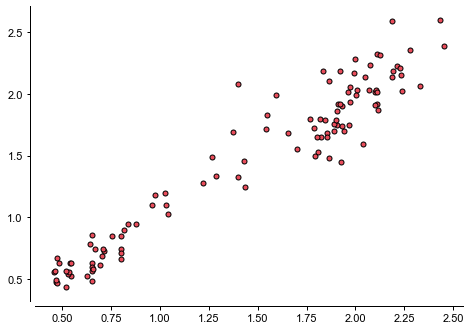

In [17]:
fig = plt.figure(figsize=((8.5/2.54*2), (6/2.54*2)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(val_label, pred_output, 'o', ms=5, mec='k', c=cmap[0])


fig.tight_layout()

In [18]:
pred_df = pd.DataFrame(val_label, index=val_indices[:, 0], columns=['label'])
pred_df['pred'] = pred_output
pred_df.index = pd.DatetimeIndex(pred_df.index)
pred_df = pred_df.sort_index()

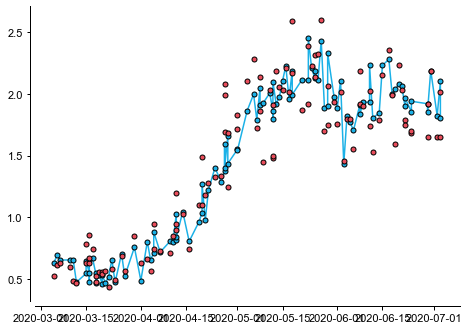

In [19]:
fig = plt.figure(figsize=((8.5/2.54*2), (6/2.54*2)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(pred_df.index, pred_df['label'], '-o', ms=5, mec='k', c=cmap[4])
ax0.plot(pred_df.index, pred_df['pred'], 'o', ms=5, mec='k', c=cmap[0])


fig.tight_layout()

In [20]:
pred_df.to_csv('./results/model_output/linreg.csv')